<a href="https://colab.research.google.com/github/AaronReichert/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

In [0]:
#important imports
import numpy as np
import pandas as pd
import math
import statistics
import matplotlib.pyplot as plt


## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [101]:
last_week_sales=[3505, 2400, 3027, 2798, 3700, 3250, 2689]
def my_mean(df):
  counter=0
  total=0
  for entry in df:
    total+=entry
    counter+=1
  return(f'the mean is {total/counter:,.2f}')
print(my_mean(last_week_sales))

the mean is 3,052.71


In [102]:
statistics.mean(last_week_sales)

3052.714285714286

In [103]:
def my_variance(df):
  counter=0
  total=0
  for entry in df:
    total+=entry
    counter+=1
  temp_mean=total/counter
  counter=0
  total=0
  for entry in df:
    total+=(entry-temp_mean)**2
    counter+=1
  counter+=-1
  return(f'the variance is {total/6:,.2f}')
print(my_variance(last_week_sales))


the variance is 214,387.90


In [104]:
statistics.variance(last_week_sales)

214387.90476190476

In [105]:
def my_std(df):
  counter=0
  total=0
  for entry in df:
    total+=entry
    counter+=1
  temp_mean=total/counter
  counter=0
  total=0
  for entry in df:
    total+=(entry-temp_mean)**2
    counter+=1
  return(f'the standard deviation is {(total/counter)**.5:,.2f}')
print(my_std(last_week_sales))

the standard deviation is 428.67


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [106]:
last_week_coustomers=[127, 80, 105, 92, 120, 115, 93] 
print(f'{np.cov(last_week_sales,last_week_coustomers)[0][1]:.2f}')

7604.36


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
# can't do math with strings so lets define some new functions

In [0]:
def just_mean(df):
  counter=0
  total=0
  for entry in df:
    total+=entry
    counter+=1
  return(total/counter)

In [0]:
def just_variance(df):
  counter=0
  total=0
  for entry in df:
    total+=entry
    counter+=1
  temp_mean=total/counter
  counter=0
  total=0
  for entry in df:
    total+=(entry-temp_mean)**2
    counter+=1
  return(total/counter)

In [0]:
def just_std(df):
  counter=0
  total=0
  for entry in df:
    total+=entry
    counter+=1
  temp_mean=total/counter
  counter=0
  total=0
  for entry in df:
    total+=(entry-temp_mean)**2
    counter+=1
  counter+=-1
  return((total/counter)**.5)

In [111]:
print(just_std(last_week_coustomers))
print(just_std(last_week_sales))

17.057326313123664
463.0204150595357


In [112]:
print(np.cov(last_week_sales,last_week_coustomers)[0][1])

7604.357142857142


In [113]:
# where was I?
# 1.3 Find the standard deviation of customers who entered the store last week. 
# Then, use the standard deviations of both sales and customers to standardize the covariance 
# to find the correlation coefficient that summarizes the relationship between sales and customers. 
# (You may use library functions to check your work.)
denominator=just_std(last_week_coustomers)*just_std(last_week_sales)
print(denominator)

7897.890309308459


In [114]:
7604.357142857142/ denominator

0.9628339778148909

In [115]:
df_last_week=pd.DataFrame({'coustomers':last_week_coustomers,'sales':last_week_sales})
df_last_week.corr()

,coustomers,sales
coustomers,1.000000,0.962834
sales,0.962834,1.000000


In [116]:
print('Check Work:', df_last_week['sales'].corr(df_last_week['coustomers']))

Check Work: 0.9628339778148909


In [117]:
print(df_last_week.sales.std())
print(df_last_week.coustomers.std())

463.0204150595357
17.057326313123664


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [118]:
url=('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
titanic_df=pd.read_csv(url)
titanic_df.sample(3)

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1289,1290,3.0,0.0,"Wiklund, Mr. Karl Johan",male,21.0,1.0,0.0,3101266,6.4958,NaN,S,NaN,NaN,NaN,0
228,229,1.0,0.0,"Penasco y Castellana, Mr. Victor de Satode",male,18.0,1.0,0.0,PC 17758,108.9000,C65,C,NaN,NaN,"Madrid, Spain",1
205,206,1.0,0.0,"Millet, Mr. Francis Davis",male,65.0,0.0,0.0,13509,26.5500,E38,S,NaN,249.0,"East Bridgewater, MA",1


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

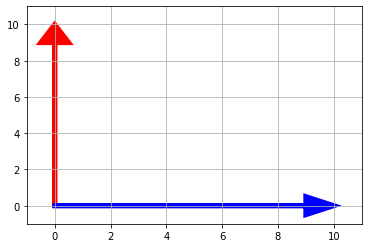

In [123]:
fig,ax=plt.subplots()
ax.grid()
plt.xlim(-1,11)
plt.ylim(-1,11)
plt.arrow(0,0,0,9,head_width=1,head_length=1,linewidth=5,color='r')
plt.arrow(0,0,9,0,head_width=1,head_length=1,linewidth=5,color='b')

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [125]:
a=[-5,3,7]
b=[6,-8,2]
if np.dot(a,b)==0:
  print('they are orthogonal')
else:
  print('they are not orthogonal')

they are not orthogonal


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [133]:
c=[2,-15,6,20]
print((np.linalg.norm(c))**2)
print(np.dot(c,c))
c=pd.DataFrame([2,-15,6,20])
print(c*c.T)


665.0
665
     0   1   2   3
0  4.0 NaN NaN NaN
1  NaN NaN NaN NaN
2  NaN NaN NaN NaN
3  NaN NaN NaN NaN


In [0]:
# the first 2 are 665. I am guessing the last one is supposed to be also but i think i screwed up

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

Your text here

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [139]:
f=[4,12,11,92]
unit_vector_f=f/np.linalg.norm(f)
print(unit_vector_f)

[0.04277402 0.12832206 0.11762856 0.9838025 ]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

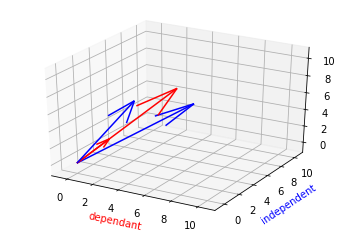

In [153]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-1, 11])
ax.set_ylim([-1, 11])
ax.set_zlim([-1, 11])
ax.quiver(0,0,0,2,1,3,color='r')
ax.quiver(0,0,0,6,3,9,color='r')
ax.quiver(0,0,0,5,7,5,color='b')
ax.quiver(0,0,0,4,1,8,color='b')
ax.set_xlabel('dependant',color='r')
ax.set_ylabel('independent',color='b')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
# the span of 2 lineraly dependent vectors is one dimensional space or r1

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
# the span of 3 linerialy independent vectors is three dimensional space or R3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



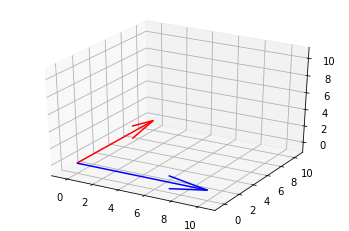

In [164]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-1, 11])
ax.set_ylim([-1, 11])
ax.set_zlim([-1, 11])
ax.quiver(0,0,0,0,10,0,color='r')
ax.quiver(0,0,0,10,0,0,color='b')
plt.show()

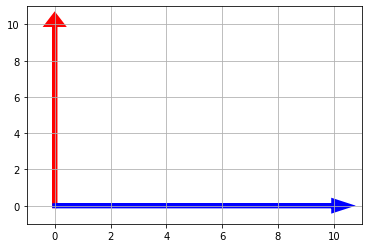

In [163]:
fig,ax=plt.subplots()
ax.grid()
plt.xlim(-1,11)
plt.ylim(-1,11)
plt.arrow(0,0,0,10,head_width=.5,head_length=.5,linewidth=5,color='r')
plt.arrow(0,0,10,0,head_width=.5,head_length=.5,linewidth=5,color='b')

## 6.2 What does it mean to form a basis?

2 lineraly independent vectors that can be used for create 2 dimensional space or R2

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
# 3

## 7.2 What does the rank of a matrix tell us?

how many dimensions of space you can create from those vectors

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

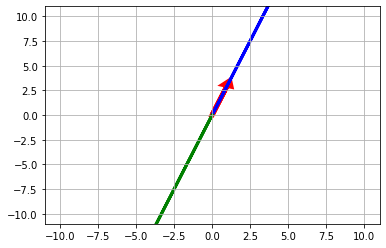

In [176]:
v=pd.array([1,3])
fig,ax=plt.subplots()
ax.grid()
plt.xlim(-11,11)
plt.ylim(-11,11)
plt.arrow(0,0,*v,head_width=.5,head_length=.5,linewidth=5,color='r')
plt.arrow(0,0,*v*99,linewidth=3,color='b')
plt.arrow(0,0,*v*-99,linewidth=3,color='g')

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()